<a href="https://colab.research.google.com/github/WelfLowe/Public-ML-Notebooks/blob/master/Variants_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize


In [23]:
# Generate random dataset
np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 2.5 * X + np.random.normal(0, 2, size=X.shape) + 5  # y = 2.5x + 5 noise
y[18]=15

In [17]:
# Reshape for TensorFlow
X_train = X.reshape(-1, 1)
y_train = y.reshape(-1, 1)

# Define and train MSE-based Linear Regression model
model_mse = keras.Sequential([keras.layers.Dense(1, use_bias=True, kernel_initializer="zeros", bias_initializer="zeros")])
model_mse.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")
model_mse.fit(X_train, y_train, epochs=1000, verbose=0)

# Define and train MAE-based Linear Regression model
model_mae = keras.Sequential([keras.layers.Dense(1, use_bias=True, kernel_initializer="zeros", bias_initializer="zeros")])
model_mae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mae")
model_mae.fit(X_train, y_train, epochs=1000, verbose=0)


In [18]:
def show_model(model):
  model.summary()
  for var in model.layers[0].trainable_variables:
    print(var.name, var.shape)
    print(var.numpy())  # Convert tensor to NumPy array for readability


show_model(model_mae)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

kernel (1, 1)
[[2.549726]]
bias (1,)
[3.7804866]


In [24]:
# Generate predictions
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred_mse = model_mse.predict(X_pred)
y_pred_mae = model_mae.predict(X_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [20]:
# Fit a standard Linear Regression model (MSE-based)
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
y_pred_lr = lr.predict(X.reshape(-1, 1))


In [21]:
# Define the LAD loss function
def lad_loss(params, x, y):
    a, b = params
    return np.sum(np.abs(a * x + b - y))  # Sum of absolute deviations

# Initial guess for (a, b)
initial_guess = [1, 1]

# Solve using optimization
result = minimize(lad_loss, initial_guess, args=(X, y), method='Powell')

# Get optimal a and b
a_opt, b_opt = result.x
print(f"LAD Regression: a = {a_opt:.3f}, b = {b_opt:.3f}")

y_pred_lad = a_opt * X.reshape(-1, 1) + b_opt  # LAD regression line


LAD Regression: a = 2.085, b = 6.470


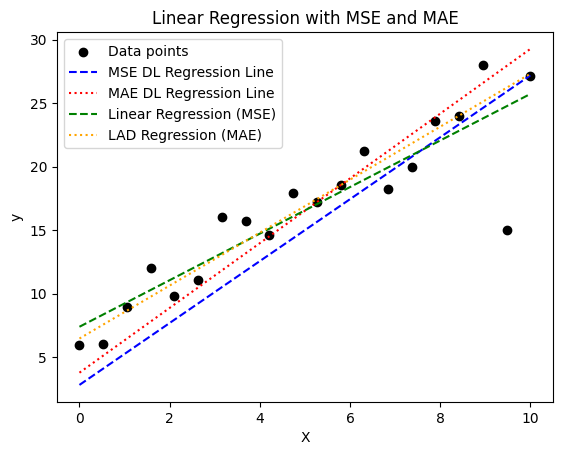

In [30]:
# Plot data and regression lines
plt.scatter(X, y, color='black', label="Data points")
plt.plot(X_pred, y_pred_mse, label="MSE DL Regression Line", color="blue", linestyle="dashed")
plt.plot(X_pred, y_pred_mae, label="MAE DL Regression Line", color="red", linestyle="dotted")
plt.plot(X, y_pred_lr, color='green', linestyle='dashed', label="Linear Regression (MSE)")
plt.plot(X, y_pred_lad, color='orange', linestyle="dotted", label='LAD Regression (MAE)')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with MSE and MAE")
plt.legend()
plt.show()